## Exercise 7.3: Original Case Study Part 1 & 2 & 3

### DSC 550

#### Taniya Adhikari 02/07/2021

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import yellowbrick
import seaborn as sns


import warnings; warnings.simplefilter('ignore')

## Case Study:  Analyze data for Home loan approval prediction

<a id='Part_1_Analysis_-_Graph_Analysis'></a>
### Part 1 Analysis - Graph Analysis

### Introduction

Dream Housing Finance company is a growing company that provides Home loans in all over US Areas. They first check the eligibility of the customers before customers apply for the application. The company is interested in automating the pre-approval eligibility process by evaluating the customer's data provided by them on the application. This is important, as this provides the customer their likelihood of getting approved before they apply for the loan. The data is provided by the company to determine the eligibility of the customer so they can target these customers. There are many factors that can determine the eligibility of the customer, such as education level, Income, Credit History, etc. For this project, we will attempt to analyze what factors are significant in approving the loan.


### Data

1. Data Source: [Loan Eligibility Data](https://www.kaggle.com/vikasukani/loan-eligible-dataset?select=loan-train.csv)  from kaggle.com.  
2. Data variables in the file are:
Key Name	Description      
     
Gender - Male/ Female   
Married - Applicant married (Y/N)    
Dependents - Number of dependents
Education - Applicant Education (Graduate/ Under Graduate)    
Self_Employed - Self-employed (Y/N)   
ApplicantIncome - Applicant income   
CoapplicantIncome - Coapplicant income  
LoanAmount - Loan amount in thousands  
Loan_Amount_Term - 	Term of a loan in months   
Credit_History	- credit history meets guidelines   
Property_Area - Urban/ Semi-Urban/ Rural   
Loan_Status	- Loan approved (Y/N)  

#### 1.	Load the data from the “train.csv” file into a DataFrame.

In [2]:
# Loading the data
sample_dt = pd.read_csv("loan-train.csv")
test_dt = pd.read_csv("loan-test.csv")

#### 2.	Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.data

In [3]:
print("The dimension of the sample table is: ", sample_dt.shape)

The dimension of the sample table is:  (614, 13)


In [4]:
print("The dimension of the test table is: ", test_dt.shape)

The dimension of the test table is:  (367, 12)


Sample dataset has 614 records and 13 variables.  
Testing dataset has 367 records and 12 variables

#### 3.	Display the first 5 rows of data so you can see the column headings and the type of data for each column.

In [5]:
# Display the data
sample_dt.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_Status variable is Boolean variable with Y or N, Missing values have NaN. Loan_Status will be the target variable and all other columns will be features.

In [6]:
# Checking data type
def Datatype(df):
    # shape and data types of the data
    print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print(df.dtypes)

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)

    # select non numeric columns
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    non_numeric_cols = df_non_numeric.columns.values
    print(non_numeric_cols)


In [7]:
Datatype(sample_dt)

There are 614 rows and 13 columns
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History']
['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'Property_Area' 'Loan_Status']


There are 5 numerical variables and 8 categorical variables.

In [8]:
# Check for duplicates in sample
print("Loan ID duplicated: {}".format(any(sample_dt.Loan_ID.duplicated())))

Loan ID duplicated: False


In [9]:
# Check for duplicates in test set
print("Loan ID duplicated: {}".format(any(test_dt.Loan_ID.duplicated())))

Loan ID duplicated: False


Renaming variables to make it easier to remember.

In [10]:
# renaming headers of sample data
sample_df = sample_dt.rename(columns={"ApplicantIncome" : "Applicant_Income", "CoapplicantIncome": "Co-Applicant_Income", "LoanAmount": "Loan_Amount_Thousands", "Loan_Amount_Term": "Loan_Term_Months", "Credit_History": "Credit_History_Requirements", "Loan_Status": "Loan_Approval"})

# renaming headers of test data
test_df = test_dt.rename(columns={"ApplicantIncome" : "Applicant_Income", "CoapplicantIncome": "Co-Applicant_Income", "LoanAmount": "Loan_Amount_Thousands", "Loan_Amount_Term": "Loan_Term_Months", "Credit_History": "Credit_History_Requirements"})

In [11]:
sample_df["Credit_History_Requirements"].replace({1.0: "Yes", 0.0: "No"}, inplace=True)
test_df["Credit_History_Requirements"].replace({1.0: "Yes", 0.0: "No"}, inplace=True)

#### 4.	Summary Statistics of Data

Describing the Statistics of all numerical data

In [12]:
print("Describe Data")
sample_df.describe()

Describe Data


,Applicant_Income,Co-Applicant_Income,Loan_Amount_Thousands,Loan_Term_Months
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


Summary for categorical data

In [13]:
print("Summarized Data")
sample_df.describe(include=['O'])

Summarized Data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History_Requirements,Property_Area,Loan_Approval
count,614,601,611,599,614,582,564,614,614
unique,614,2,2,4,2,2,2,3,2
top,LP002600,Male,Yes,0,Graduate,No,Yes,Semiurban,Y
freq,1,489,398,345,480,500,475,233,422


In [14]:
stat = sample_df.describe(include=['O'])

In [15]:
Percentage_top = []
for col in stat.columns:
    x = (stat.at['freq', col]/stat.at['count', col])*100
    x = round(x, 2)
    Percentage_top.append(x)

In [16]:
stat.loc['Percentage_top'] = Percentage_top

The minimum and maximum of applicant income is 150 and 81,000. So, Income can be an important feature. Co-applicant income can also be an important variable. Credit history requirements has more frequent Yes, while self_employed has more frequent No.

#### 5.	Histograms for Numeric Data

In [17]:
def histogram(xaxes, yaxes, df, x, y, nrows, color):
    # set figure size
    plt.rcParams['figure.figsize'] = (x, y)

    # make subplots
    fig, axes = plt.subplots(nrows = nrows, ncols = 2)
  
    # draw histograms in for loop
    axes = axes.ravel()
    for idx, ax in enumerate(axes):
        # drops NaN values
        ax.hist(df[num_features[idx]].dropna(), bins=40, color= color)
        ax.set_xlabel(xaxes[idx], fontsize=20)
        ax.set_ylabel(yaxes[idx], fontsize=20)
        ax.tick_params(axis='both', labelsize=15)

    plt.show()


**Sample Data**

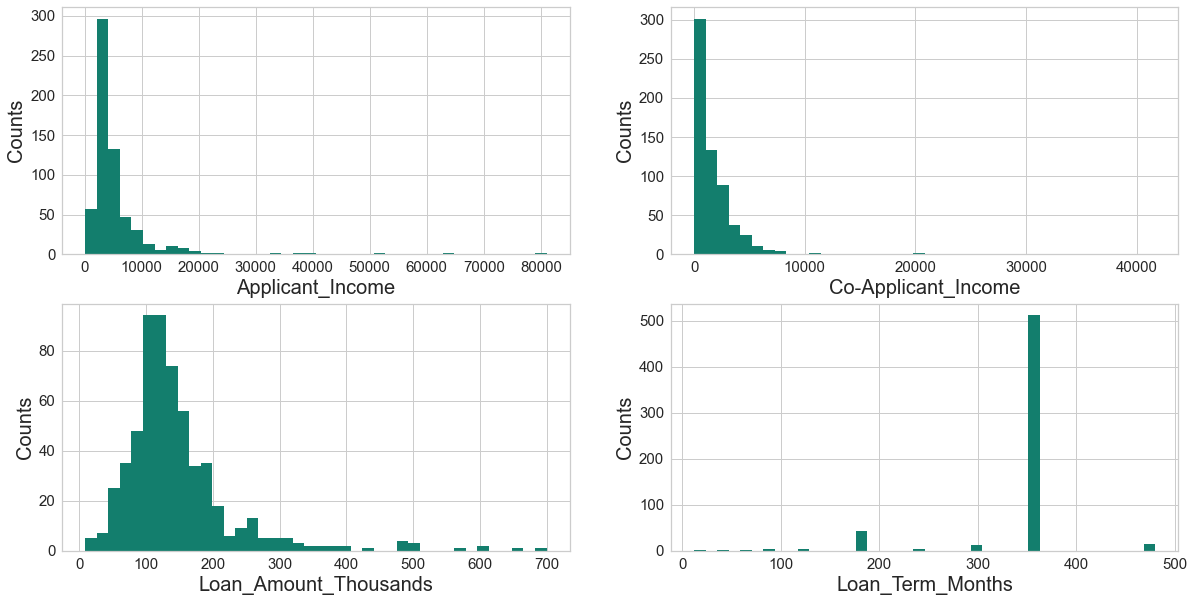

In [18]:
# Specify the features of interest
num_features = ['Applicant_Income', 'Co-Applicant_Income', 'Loan_Amount_Thousands', 'Loan_Term_Months']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
histogram(xaxes, yaxes, sample_df, 20, 10, 2, 'xkcd:blue green')

1.	Applicant Income has a median 3812 with extreme value of 81,000
2.	Most Applicants had no Co-applicants with mean co-applicant income is 1621
3.	Median loan amount is 146,412.
4.	Loan term seems like a categorical data type

#### 6.	Boxplot for Numeric Data

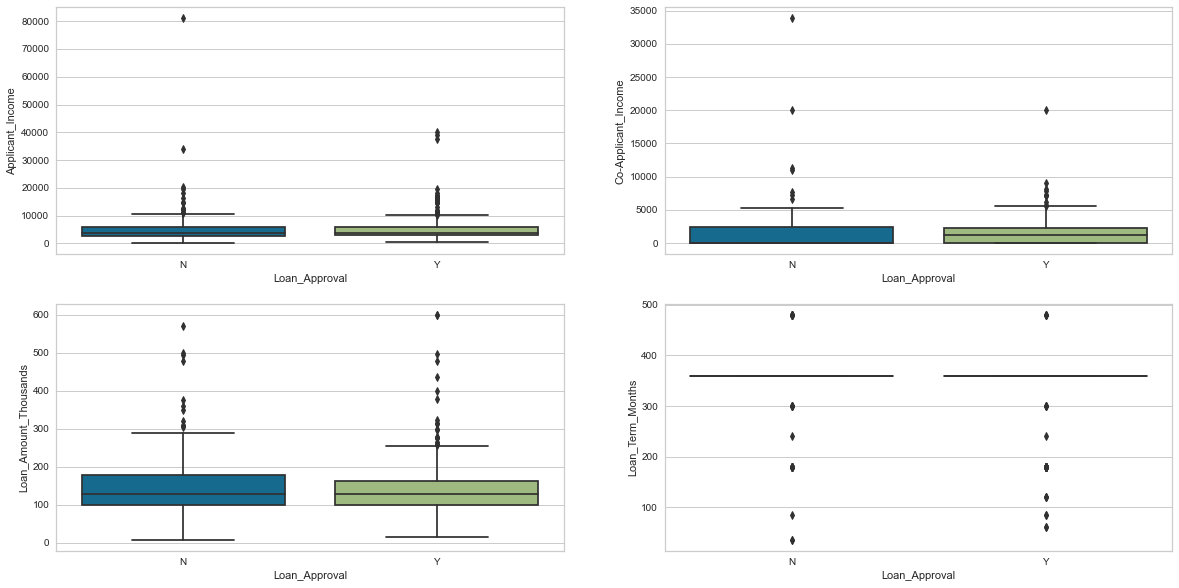

In [19]:
# set figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# draw boxplots in for loop
axes = axes.ravel()
for idx, col in enumerate(num_features):
    # seaborn library 
    sns.boxplot(y=col,x='Loan_Approval', data=sample_df.dropna(), ax=axes[idx])

plt.show()


Numerical Data has no significant relevance to the Loan Approval

#### 7.	Bar Charts for the Categorical Data

In [20]:
def barcharts(features, df, x, y, nrows):
    # set figure size
    plt.rcParams['figure.figsize'] = (x, y)

    fig,axes = plt.subplots(nrows = nrows, ncols = 2)
    for idx,col in enumerate(features):
        if col != 'Loan_Approval':
            row,column = idx//2,idx%2
            sns.countplot(x=col,data=df,hue=df['Loan_Approval'],ax=axes[row,column])
            plt.legend(["blue", "orange"], prop={"size":10})


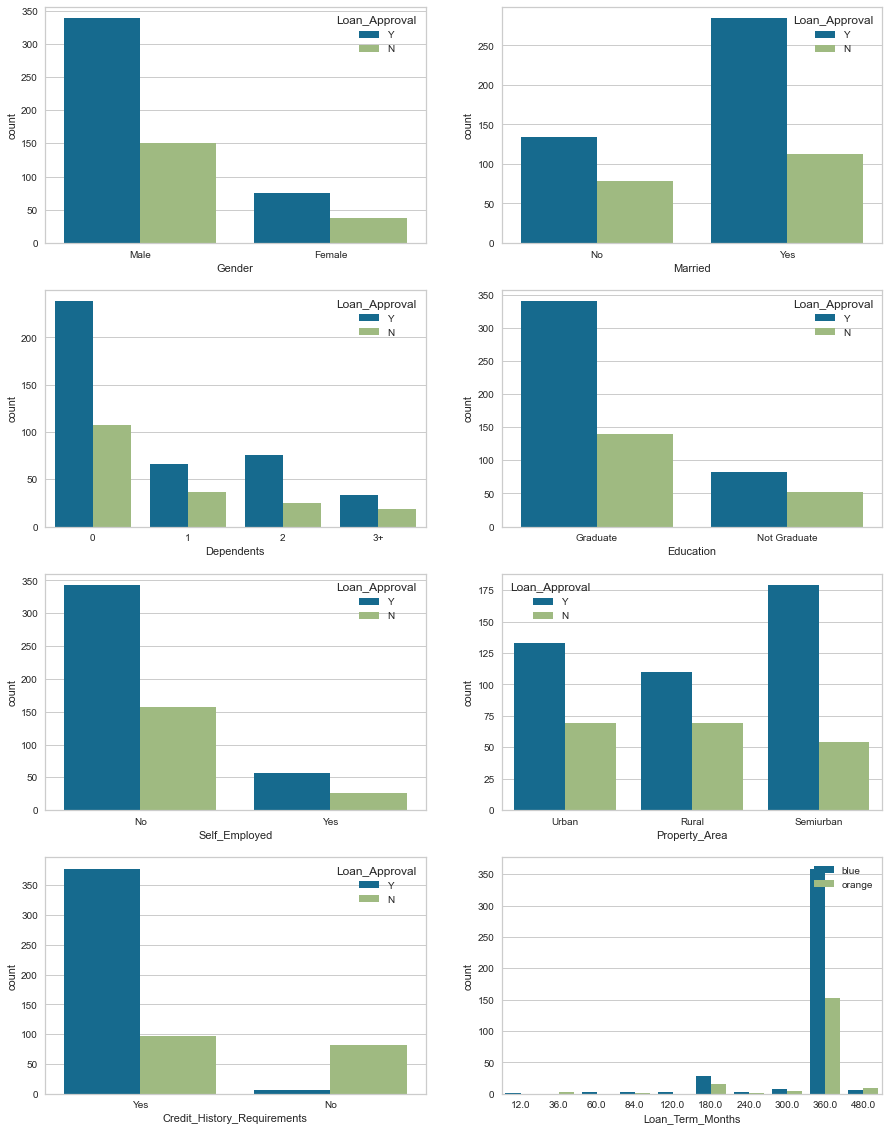

In [21]:
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History_Requirements', 'Loan_Term_Months']
barcharts(cat_features, sample_df, 15, 20, 4)

In [22]:
stat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History_Requirements,Property_Area,Loan_Approval
count,614,601,611,599,614,582,564,614,614
unique,614,2,2,4,2,2,2,3,2
top,LP002600,Male,Yes,0,Graduate,No,Yes,Semiurban,Y
freq,1,489,398,345,480,500,475,233,422
Percentage_top,0.16,81.36,65.14,57.6,78.18,85.91,84.22,37.95,68.73


In [23]:
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History_Requirements','Loan_Term_Months', 'Loan_Approval']
cat = sample_df[cat_features]
for col in cat.columns:
    if col !='Loan_Approval':
        Approval = cat.groupby(col).describe(include=['O'])['Loan_Approval']
        for i, rows in Approval.iterrows():
            p = (Approval.at[i, 'freq']/Approval.at[i, 'count'])*100
            print('{} rate in {} of {} is {}%'.format(Approval.at[i, 'top'], Approval.index.name, i, round(p,2)))


Y rate in Gender of Female is 66.96%
Y rate in Gender of Male is 69.33%
Y rate in Married of No is 62.91%
Y rate in Married of Yes is 71.61%
Y rate in Dependents of 0 is 68.99%
Y rate in Dependents of 1 is 64.71%
Y rate in Dependents of 2 is 75.25%
Y rate in Dependents of 3+ is 64.71%
Y rate in Education of Graduate is 70.83%
Y rate in Education of Not Graduate is 61.19%
Y rate in Self_Employed of No is 68.6%
Y rate in Self_Employed of Yes is 68.29%
Y rate in Property_Area of Rural is 61.45%
Y rate in Property_Area of Semiurban is 76.82%
Y rate in Property_Area of Urban is 65.84%
N rate in Credit_History_Requirements of No is 92.13%
Y rate in Credit_History_Requirements of Yes is 79.58%
Y rate in Loan_Term_Months of 12.0 is 100.0%
N rate in Loan_Term_Months of 36.0 is 100.0%
Y rate in Loan_Term_Months of 60.0 is 100.0%
Y rate in Loan_Term_Months of 84.0 is 75.0%
Y rate in Loan_Term_Months of 120.0 is 100.0%
Y rate in Loan_Term_Months of 180.0 is 65.91%
Y rate in Loan_Term_Months of 240

<a id='Key_Observations'></a>

#### Key Observations

##### 1. There 81.36% male applicants and had 69.33% chance of approval. Slightly higher than females
##### 2. There were 65.14% percent of married applicants, with approval rate of 71.61%
##### 3. Although, there were higher number of applicants with 0 dependents, their approval rate (68.99%) was slightly lower than the applicants with atleast 2 dependents (75.25%).
##### 4. There were 78.18% college graduate applicants with approvalr rate of 70.83%.
##### 5. There were 85.91% applicants who were not Self_Employed. Approval rate for self-employed (68.3%) and non self employed (68.6%) were almost the same.
##### 6. Applicants from Semi-urban areas are likely to be approved with 76.82% approval rate. There were also more applicants from semiurban areas.
##### 7. Applicants who meet the credit history requirements has 79.58% chance of getting approved, applicants who didn't meet credit history requirements had 92.13% chance of getting denied.
##### 8. About 68.73% of the Loans are approved out of total applications.
##### 9. 85.3% loans were for 360 months, with 70.12% approval rate. Less than or equal 60 months loan term had 100% approval.

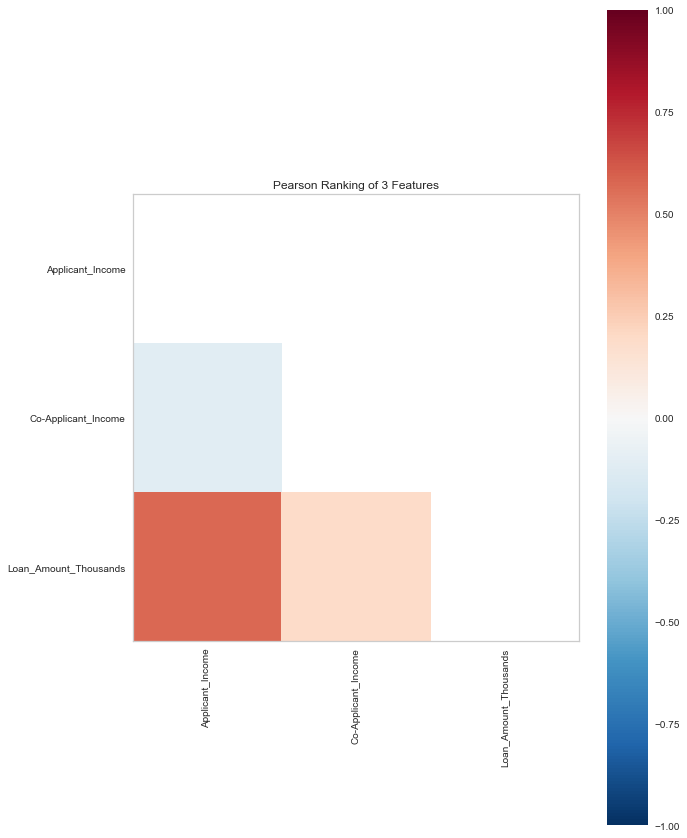

<AxesSubplot:title={'center':'Pearson Ranking of 3 Features'}>

In [24]:
num_features = ['Applicant_Income', 'Co-Applicant_Income', 'Loan_Amount_Thousands']

#set up the figure size
plt.rcParams['figure.figsize'] = (10, 15)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = sample_df[num_features].dropna().values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')

# Fit the data to the visualizer
visualizer.fit(X)

# Transform the data
visualizer.transform(X)

visualizer.show()

There seem to have some positive correlation (~.50) between loan amount and applicant salary. There is a weak correlation between loan amount and co-applicant salary.

#### 8. Part 1 Summary

##### Observations

1. Married couple with zero dependents is more likely to get approved.
2. It is possible for higher approval in males (need more analysis to confirm).
3. Applicants with graduate degree and applicants who are not self-employed has more chances for approval.
4. Applicant's residence area matter.

##### Part 2 Steps

1. Analyze more based on individual categories.
2. Deal with Anomalies and see whether to keep or drop it.
3. Feature selection if needed.
4. Select classifier model to build automated system to approve loans.

<a id='Part_2_Analysis_-_Dimensionality_Reduction'></a>
### Part 2 Analysis - Dimensionality Reduction

#### 1.	Handling Missing Values

In [25]:
# check for missing value
def percentMissing(df):
    
    df_numeric = df.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values
    print(numeric_cols)
    
    # % of missing data
    for col in df.columns:
        # create missing indicator for features with missing data
        missing = df[col].isnull()
        pct_missing = np.mean(missing)*100
        print('{} - {}%'.format(col, round(pct_missing)))
        num_missing = np.sum(missing)
        
    return df

In [26]:
test_df = percentMissing(test_df)

['Applicant_Income' 'Co-Applicant_Income' 'Loan_Amount_Thousands'
 'Loan_Term_Months']
Loan_ID - 0%
Gender - 3%
Married - 0%
Dependents - 3%
Education - 0%
Self_Employed - 6%
Applicant_Income - 0%
Co-Applicant_Income - 0%
Loan_Amount_Thousands - 1%
Loan_Term_Months - 2%
Credit_History_Requirements - 8%
Property_Area - 0%


In [27]:
# dropping rows
test_df = test_df.dropna(axis=0)
test_df.shape

(289, 12)

Missing value for test dataset is easy to fix, we just going to drop it because we are treating it as unknown dataset

In [28]:
sample_df = percentMissing(sample_df)

['Applicant_Income' 'Co-Applicant_Income' 'Loan_Amount_Thousands'
 'Loan_Term_Months']
Loan_ID - 0%
Gender - 2%
Married - 0%
Dependents - 2%
Education - 0%
Self_Employed - 5%
Applicant_Income - 0%
Co-Applicant_Income - 0%
Loan_Amount_Thousands - 4%
Loan_Term_Months - 2%
Credit_History_Requirements - 8%
Property_Area - 0%
Loan_Approval - 0%


Missing value for sample dataset is little tricky, we will try to predict values by using KNN Imputer, which is based on knn model to predict and fill in the values. I do not want to drop the values because I think they all have some significance in the loan approval. I will revisit this step later after converting the categorical data into numerical or binary data

In [29]:
# Check for duplicates
print("Loan ID duplicated: {}".format(any(sample_df.Loan_ID.duplicated())))

Loan ID duplicated: False


Removing Loan_ID features since they are unique values and add no value to the data.

In [30]:
sample_df = sample_df.drop(columns=['Loan_ID'])
test_df = test_df.drop(columns=['Loan_ID'])

In [31]:
# converting features
sample_df = sample_df.replace({'Gender': {'Male': 1, 'Female': 0},'Married': {'Yes': 1, 'No': 0},
                         'Dependents': {'3+': 3}, 'Education': {'Graduate': 1, 'Not Graduate': 0},
                         'Self_Employed': {'Yes': 1, 'No': 0},'Credit_History_Requirements': {'Yes': 1, 'No': 0},
                         'Property_Area': {'Semiurban': 1, 'Urban': 2, 'Rural': 3}})

test_df = test_df.replace({'Gender': {'Male': 1, 'Female': 0},'Married': {'Yes': 1, 'No': 0},
                         'Dependents': {'3+': 3}, 'Education': {'Graduate': 1, 'Not Graduate': 0},
                         'Self_Employed': {'Yes': 1, 'No': 0},'Credit_History_Requirements': {'Yes': 1, 'No': 0},
                         'Property_Area': {'Semiurban': 1, 'Urban': 2, 'Rural': 3}})

In [32]:
# Load libraries
from sklearn.impute import KNNImputer

In [33]:
X, Y = sample_df.drop(columns='Loan_Approval'), sample_df['Loan_Approval']

In [34]:
# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)


In [35]:
col_names = []
for col in X.columns:
    col_names.append(col)

In [36]:
col_names

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Applicant_Income',
 'Co-Applicant_Income',
 'Loan_Amount_Thousands',
 'Loan_Term_Months',
 'Credit_History_Requirements',
 'Property_Area']

In [37]:
X_df = pd.DataFrame(Xtrans,columns=col_names)

In [38]:
percentMissing(X_df)

['Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'Applicant_Income' 'Co-Applicant_Income' 'Loan_Amount_Thousands'
 'Loan_Term_Months' 'Credit_History_Requirements' 'Property_Area']
Gender - 0%
Married - 0%
Dependents - 0%
Education - 0%
Self_Employed - 0%
Applicant_Income - 0%
Co-Applicant_Income - 0%
Loan_Amount_Thousands - 0%
Loan_Term_Months - 0%
Credit_History_Requirements - 0%
Property_Area - 0%


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-Applicant_Income,Loan_Amount_Thousands,Loan_Term_Months,Credit_History_Requirements,Property_Area
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,147.8,360.0,1.0,2.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,3.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,3.0
610,1.0,1.0,3.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,3.0
611,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0
612,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0


Stripping white space from the text data

In [39]:
for col in X_df.columns:
    for i, row in X_df.iterrows():
        x = X_df.at[i, col]
        if ( 0.0 < x < 0.5):
            X_df.at[i, col] = 0
        elif ( 0.5 < x < 1.0):
            X_df.at[i, col] = 1
        else:
            None

In [40]:
# converting Boolean or categorical variables into integers
X_df['Gender'] = X_df['Gender'].astype(int)
X_df['Married'] = X_df['Married'].astype(int)
X_df['Dependents'] = X_df['Dependents'].astype(int)
X_df['Education'] = X_df['Education'].astype(int)
X_df['Self_Employed'] = X_df['Self_Employed'].astype(int)
X_df['Loan_Term_Months'] = X_df['Loan_Term_Months'].astype(int)
X_df['Credit_History_Requirements'] = X_df['Credit_History_Requirements'].astype(int)
X_df['Property_Area'] = X_df['Property_Area'].astype(int)

#### 2. Splitting the data before Data Transformation and Dimensionality Reduction

In [41]:
from sklearn.model_selection import train_test_split
features = sample_df.drop(columns=['Loan_Approval'])
target = sample_df.Loan_Approval

# split the data
X_train, X_val, Y_train, Y_val = train_test_split(X_df, Y, test_size =0.25, random_state = 42, shuffle = True, stratify = Y)

In [42]:
X_train.shape, X_val.shape

((460, 11), (154, 11))

Training set has 460 observations.  
Validation set has 154 observations

#### 3. Transforming variables (applicant's income, co-applicant's income, and loan amount because it is highly skewed data. Adding a Boolean variable of co-applicant and further extend the graph analysis for these three variables.**

In [43]:
# log-transformation of applicant's income and co-applicant's income and loan amount
def log_transformation(data):
    return data.apply(np.log1p)      

In [44]:
def num_log(df):
    
    df['App_Income_log1p'] = log_transformation(df['Applicant_Income'])
    df['Co-App_Income_log1p'] = log_transformation(df['Co-Applicant_Income'])
    df['Loan_Amount_log1p'] = log_transformation(df['Loan_Amount_Thousands'])
    return df

In [45]:
def CoApp(df):
    for index, row in df.iterrows():
        if df.at[index, 'Co-Applicant_Income'] == 0:
            df.at[index, 'Co-Applicant'] = 'No'
        else:
            df.at[index, 'Co-Applicant'] = 'Yes'
    return df

In [46]:
X_train = num_log(X_train)
X_val = num_log(X_val)

test_df= num_log(test_df)

In [47]:
X_train['Co-Applicant'] = ''
X_train = CoApp(X_train)

X_val['Co-Applicant'] = ''
X_val = CoApp(X_val)

test_df['Co-Applicant'] = ''
test_df = CoApp(test_df)

In [48]:
X_train = X_train.replace({'Co-Applicant': {'Yes': 1, 'No': 0}})

In [49]:
test_df = test_df.replace({'Co-Applicant': {'Yes': 1, 'No': 0}})

In [50]:
X_val = X_val.replace({'Co-Applicant': {'Yes': 1, 'No': 0}})

In [51]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-Applicant_Income,Loan_Amount_Thousands,Loan_Term_Months,Credit_History_Requirements,Property_Area,App_Income_log1p,Co-App_Income_log1p,Loan_Amount_log1p,Co-Applicant
1,1,1,1,1,0,4583.0,1508.0,128.0,360,1,3,8.430327,7.319202,4.859812,1
394,1,1,2,1,0,3100.0,1400.0,113.0,360,1,2,8.039480,7.244942,4.736198,1
316,1,1,2,1,0,3717.0,0.0,120.0,360,1,1,8.220941,0.000000,4.795791,0
62,1,1,0,0,1,2609.0,3449.0,165.0,180,0,3,7.867106,8.146130,5.111988,1
158,1,0,0,1,0,2980.0,2083.0,120.0,360,1,3,8.000014,7.642044,4.795791,1


#### 4. Plotting transformed variables

Plotting Applicant's Income and it's log transformation

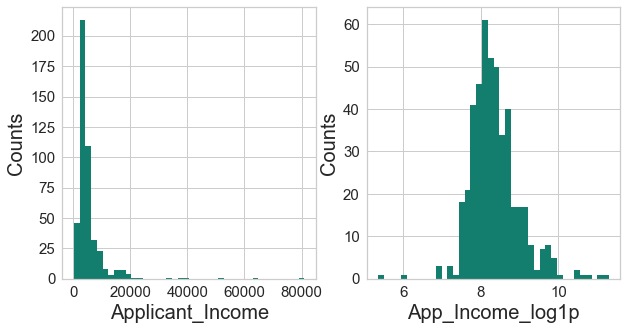

In [52]:
# Specify the features of interest
num_features = ['Applicant_Income', 'App_Income_log1p']
xaxes = num_features
yaxes = ['Counts', 'Counts']
histogram(xaxes, yaxes, X_train, 10,5,1,'xkcd:blue green')

Plotting Co-Applicant's Income and it's log transformation

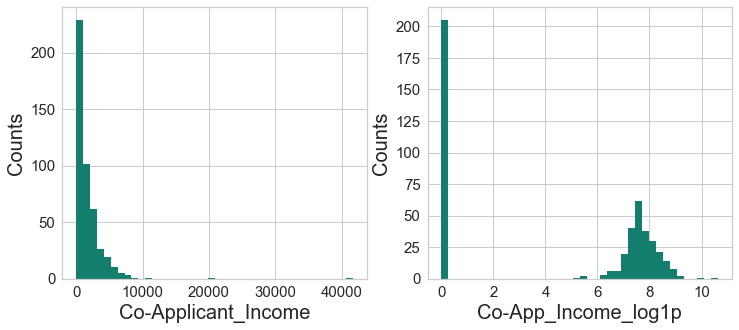

In [53]:
# Specify the features of interest
num_features = ['Co-Applicant_Income', 'Co-App_Income_log1p']
xaxes = num_features
yaxes = ['Counts', 'Counts']
histogram(xaxes, yaxes, X_train, 12,5,1,'xkcd:blue green')

Plotting Loan Amount and it's log transformation

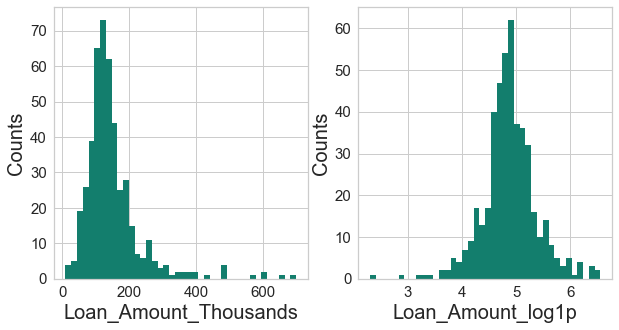

In [54]:
# Specify the features of interest
num_features = ['Loan_Amount_Thousands', 'Loan_Amount_log1p']
xaxes = num_features
yaxes = ['Counts', 'Counts']
histogram(xaxes, yaxes, X_train, 10,5,1,'xkcd:blue green')

Plotting Co-Applicant vs. Approval bar graph

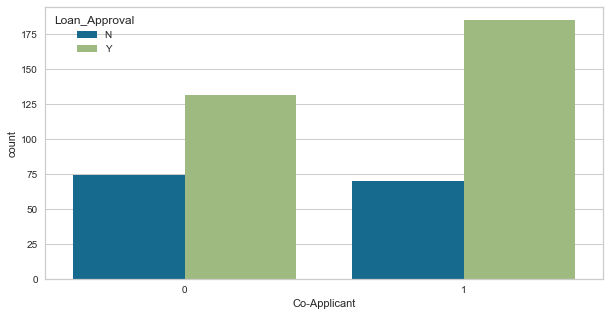

In [55]:
# set figure size
plt.rcParams['figure.figsize'] = (10, 5)

sns.countplot(x='Co-Applicant',data=X_train,hue=Y_train)
plt.show()

Loan_Term is indeed categorical data type with numerical values.

Applicants with Co-applicant are more likely to get approved for the loan compared to applicants with no co-applicant. All the log transformed variables are approximately normal except co-applicant’s income, it has lot of 0’s indicating no applicant. Loan tearm with 360 months are more likely to get approved compared to other terms

#### 5. Dimensionality reduction

For Dimensionality reduction I will be creating 2 main data frames from original data frame: df_cat with numerical variables turned into categorical and df_num with all Boolean, Nominal numeric and continuous variables.

#####    Converting Numerical variables into categorical

In [56]:
train_copy = X_train.copy()
val_copy = X_val.copy()

I converted numerical variables ‘App_Income_log1p’, ‘Co-App_Income_log1p’, ‘Loan_Amount_log1p’ by binning them into their percentile bins (below 25th, 26-50th, 51-75th and 75th above). I did this so I can use chi-square test for feature selection.

In [57]:
def numerical_to_categorical(variable):
    bins = []
    Min = variable.min()
    Twenty5 = np.percentile(variable, 25)
    Fifty = np.percentile(variable, 50)
    Seventy5 = np.percentile(variable, 75)
    Max = variable.max()
    bins.append(Min)
    bins.append(Twenty5)
    bins.append(Fifty)
    bins.append(Seventy5)
    bins.append(Max)
    return bins

Adding columns for groups for continous variables

In [58]:
#add a new column category next to the Applicant_Income group.
bins = numerical_to_categorical(train_copy['App_Income_log1p'])
category1 = pd.cut(train_copy['App_Income_log1p'],bins=bins,labels=['below_25th_percentile','26th-50th_percentile','51th-75th_percentile','above_75th_percentile'])
train_copy.insert(12,'App_Log_Income_Group',category1)

In [59]:
#add a new column category next to the Applicant_Income group.
bins = numerical_to_categorical(val_copy['App_Income_log1p'])
category1 = pd.cut(val_copy['App_Income_log1p'],bins=bins,labels=['below_25th_percentile','26th-50th_percentile','51th-75th_percentile','above_75th_percentile'])
val_copy.insert(12,'App_Log_Income_Group',category1)

In [60]:
np.where(train_copy['App_Log_Income_Group'].isnull() == True)[0]

array([370], dtype=int64)

In [61]:
np.where(val_copy['App_Log_Income_Group'].isnull() == True)[0]

array([143], dtype=int64)

In [62]:
train_copy['App_Log_Income_Group']= train_copy['App_Log_Income_Group'].fillna('below_25th_percentile')
val_copy['App_Log_Income_Group']= val_copy['App_Log_Income_Group'].fillna('below_25th_percentile')

In [63]:
train_copy['App_Log_Income_Group'].isnull().value_counts()

False    460
Name: App_Log_Income_Group, dtype: int64

Because there were lot of 0 applicants, we took 0 out and calculated the percentiles for income. 

In [64]:
#add a new column category next to the  Co-Applicant_Income group. 
df1 =train_copy[train_copy['Co-App_Income_log1p'] !=0]
bins = numerical_to_categorical(df1['Co-App_Income_log1p'])
category2 = pd.cut(train_copy['Co-App_Income_log1p'],bins=bins,labels=['below_25th_percentile','26th-50th_percentile','51th-75th_percentile','above_75th_percentile'])
train_copy.insert(14,'Co-App_Log_Income_Group',category2)

In [65]:
np.where(train_copy['Co-App_Log_Income_Group'].isnull() == True)[0]

array([  2,   8,  10,  12,  13,  22,  26,  29,  30,  31,  33,  34,  35,
        36,  38,  40,  41,  51,  54,  55,  56,  60,  62,  63,  66,  67,
        70,  75,  77,  79,  80,  81,  83,  84,  87,  91,  92,  93,  96,
        97,  98, 101, 102, 103, 104, 106, 112, 113, 115, 116, 119, 121,
       124, 125, 130, 133, 134, 136, 137, 138, 139, 142, 143, 145, 147,
       152, 153, 154, 157, 159, 160, 164, 165, 168, 170, 173, 175, 176,
       177, 180, 181, 182, 183, 184, 185, 188, 194, 198, 201, 203, 204,
       205, 206, 208, 211, 216, 219, 222, 223, 224, 225, 226, 228, 230,
       232, 233, 236, 237, 238, 240, 241, 243, 246, 250, 251, 255, 256,
       259, 265, 266, 271, 272, 274, 275, 277, 279, 281, 286, 288, 291,
       294, 295, 297, 299, 301, 307, 308, 309, 310, 313, 317, 318, 319,
       320, 321, 322, 323, 326, 327, 328, 330, 332, 333, 340, 341, 343,
       345, 349, 350, 353, 355, 361, 362, 364, 366, 367, 369, 373, 374,
       375, 380, 383, 384, 387, 388, 394, 395, 396, 397, 398, 39

In [66]:
bins

[5.247024072160486,
 7.396026191539111,
 7.650168700845001,
 8.060855752934316,
 10.637488727104339]

In [67]:
for i, rows in train_copy.iterrows():
    if train_copy.at[i, 'Co-App_Income_log1p'] == 5.247024072160486:
        train_copy.at[i, 'Co-App_Log_Income_Group'] = 'below_25th_percentile'
    else:
        None

In [68]:
train_copy['Co-App_Log_Income_Group'].isnull().value_counts()

False    255
True     205
Name: Co-App_Log_Income_Group, dtype: int64

In [69]:
#add a new column category next to the  Co-Applicant_Income group. 
df1 =val_copy[val_copy['Co-App_Income_log1p'] !=0]
bins = numerical_to_categorical(df1['Co-App_Income_log1p'])
category2 = pd.cut(val_copy['Co-App_Income_log1p'],bins=bins,labels=['below_25th_percentile','26th-50th_percentile','51th-75th_percentile','above_75th_percentile'])
val_copy.insert(14,'Co-App_Log_Income_Group',category2)

In [70]:
np.where(val_copy['Co-App_Log_Income_Group'].isnull() == True)[0]

array([  0,   1,   4,   5,   7,   8,   9,  11,  12,  13,  14,  18,  19,
        20,  21,  22,  23,  24,  28,  32,  33,  40,  42,  44,  46,  49,
        51,  53,  58,  61,  62,  66,  67,  69,  70,  71,  73,  74,  76,
        77,  78,  80,  82,  83,  85,  87,  89,  90,  91,  92,  93,  97,
        99, 102, 106, 107, 112, 114, 119, 123, 126, 127, 132, 134, 137,
       140, 141, 151, 153], dtype=int64)

In [71]:
bins

[2.8402474197790153,
 7.467205990531985,
 7.767434247838075,
 8.08217009213431,
 10.429339710318741]

In [72]:
for i, rows in val_copy.iterrows():
    if val_copy.at[i, 'Co-App_Income_log1p'] == 2.8402474197790153:
        val_copy.at[i, 'Co-App_Log_Income_Group'] = 'below_25th_percentile'
    else:
        None

In [73]:
val_copy['Co-App_Log_Income_Group'].isnull().value_counts()

False    86
True     68
Name: Co-App_Log_Income_Group, dtype: int64

In [74]:
#add a new column category next to the loan_amount_group. 
bins = numerical_to_categorical(train_copy['Loan_Amount_log1p'])
category3 = pd.cut(train_copy['Loan_Amount_log1p'],bins=bins,labels=['below_25th_percentile','26th-50th_percentile','51th-75th_percentile','above_75th_percentile'])
train_copy.insert(16,'Loan_Log_Amount_Group',category3)

In [75]:
np.where(train_copy['Loan_Log_Amount_Group'].isnull() == True)[0]

array([225], dtype=int64)

In [76]:
train_copy['Loan_Log_Amount_Group']= train_copy['Loan_Log_Amount_Group'].fillna('below_25th_percentile')

In [77]:
train_copy.shape

(460, 18)

In [78]:
# converting features
cat_features = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History_Requirements','Property_Area','Co-Applicant', 'App_Log_Income_Group', 'Co-App_Log_Income_Group', 'Loan_Log_Amount_Group', 'Loan_Term_Months']
train_copy = train_copy.replace({'Co-Applicant': {'Yes': 1, 'No': 0}, 'App_Log_Income_Group': {'below_25th_percentile': 1,'26th-50th_percentile': 2,'51th-75th_percentile': 3,'above_75th_percentile': 4},
                         'Co-App_Log_Income_Group': {'below_25th_percentile': 1,'26th-50th_percentile': 2,'51th-75th_percentile': 3,'above_75th_percentile': 4},
                         'Loan_Log_Amount_Group': {'below_25th_percentile': 1,'26th-50th_percentile': 2,'51th-75th_percentile': 3,'above_75th_percentile': 4}})
df_cat = train_copy[cat_features]

In [79]:
# converting categorical into integer
df_cat['Co-App_Log_Income_Group']= df_cat['Co-App_Log_Income_Group'].fillna(0)
df_cat['Co-App_Log_Income_Group']= df_cat['Co-App_Log_Income_Group'].astype(int)


df_cat['App_Log_Income_Group']= df_cat['App_Log_Income_Group'].astype(int)
df_cat['Loan_Log_Amount_Group']= df_cat['Loan_Log_Amount_Group'].astype(int)

In [80]:
df_cat['Dependents']= df_cat['Dependents'].astype(int)
df_cat['Loan_Term_Months'] = df_cat['Loan_Term_Months'].astype(int)

In [81]:
df_cat.shape

(460, 12)

In [82]:
# subset without the Quantitative variables
subset_cat = df_cat.drop(columns=['App_Log_Income_Group', 'Co-App_Log_Income_Group','Loan_Log_Amount_Group'])

Created data frame **df_cat** with 12 variables and data frame **subset_cat** with 9 variables (exclusing ‘App_Log_Income_Group’, ‘Co-App_Log_Income_Group’ and ‘Loan_Log_Amount_Group’).

Converting categorical variables into integers
1. Gender: Male = 1, Female = 0
2. Married: Yes = 1, No = 0
3. Education: Graduate = 1, Not Graduate = 0,
4. Self_Employed: Yes = 1, No = 0,
5. Credit_History_Requirements: Yes = 1, No = 0,
6. Co-Applicant: Yes = 1, No = 0
7. Dependents: 1 = 1, 0 = 0, 2 = 2 and 3+ = 3
8. Property_Area: Semiurban = 1, Urban = 2, Rural = 3
9. App_Log_Income_Group: below_25th_percentile = 1, 26th-50th_percentile = 2, 51th-75th_percentile = 3, above_75th_percentile = 4
10. Co-App_Log_Income_Group: no_applicants = 0, below_25th_percentile = 1, 26th-50th_percentile = 2, 51th-75th_percentile = 3, above_75th_percentile = 4
11. Loan_Log_Amount_Group: below_25th_percentile = 1, 26th-50th_percentile = 2, 51th-75th_percentile = 3, above_75th_percentile = 4
12. Loan_Term_Months: 36, 60, 84, 120, 180, 240, 300, 360, and 480 are the categories

#####    Converting categorical variables into Boolean variables, adding numerical variables and identifying nominal variable

In [83]:
train_copy.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co-Applicant_Income,Loan_Amount_Thousands,Loan_Term_Months,Credit_History_Requirements,Property_Area,App_Income_log1p,App_Log_Income_Group,Co-App_Income_log1p,Co-App_Log_Income_Group,Loan_Amount_log1p,Loan_Log_Amount_Group,Co-Applicant
1,1,1,1,1,0,4583.0,1508.0,128.0,360,1,3,8.430327,3,7.319202,1.0,4.859812,2,1
394,1,1,2,1,0,3100.0,1400.0,113.0,360,1,2,8.039480,2,7.244942,1.0,4.736198,2,1
316,1,1,2,1,0,3717.0,0.0,120.0,360,1,1,8.220941,2,0.000000,NaN,4.795791,2,0


In [84]:
# subset for only numerical values such as Income and loan amount
num_features = ['App_Income_log1p','Co-App_Income_log1p', 'Loan_Amount_log1p']
subset_num = train_copy[num_features]

In [85]:
df_num = pd.concat([subset_cat,subset_num],axis=1)
df_num.shape

(460, 12)

I created **subset_num** data frame with only continuous variables 'App_Income_log1p','Co-App_Income_log1p', 'Loan_Amount_log1p' and created **df_num** with all continuous variables and discrete variables.

In [86]:
# converting target
target = Y_train.replace({'Y': 1, 'N':0})

In [87]:
# load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from functools import partial

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [88]:
def FeatureSelector(df, y, score_func, k):
    
    # apply SelectKBest class to extract top features from categorical variables only 
    feature_selector = SelectKBest(score_func=score_func, k=k)
    features_kbest = feature_selector.fit(df,y)

    dfscores = pd.DataFrame(features_kbest.scores_)
    dfcolumns = pd.DataFrame(df.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Features','Score']  #naming the dataframe columns
    top_feature = featureScores.nlargest(k,'Score')  # best features
    return top_feature

##### Feature Selection: Chi-Square Method

Top 7 with App_Log_Income_Group, App_Log_Income_Group, and Loan_Amount_Group variables.

In [89]:
top = FeatureSelector(df_cat, target, chi2, 7)
top

,Features,Score
5,Credit_History_Requirements,15.415886
6,Property_Area,3.805272
11,Loan_Term_Months,2.620551
7,Co-Applicant,1.760707
2,Dependents,1.320029
9,Co-App_Log_Income_Group,1.253901
3,Education,0.998760


Top 7 without App_Log_Income_Group, App_Log_Income_Group, and Loan_Amount_Group variables.

In [90]:
top = FeatureSelector(subset_cat, target, chi2, 7)
top

,Features,Score
5,Credit_History_Requirements,15.415886
6,Property_Area,3.805272
8,Loan_Term_Months,2.620551
7,Co-Applicant,1.760707
2,Dependents,1.320029
3,Education,0.998760
1,Married,0.740770


##### Feature Selection: ANOVA F-value statistic

In [91]:
top =  FeatureSelector(df_num, target, f_classif, 7)
top

,Features,Score
5,Credit_History_Requirements,148.378848
6,Property_Area,11.117010
3,Education,4.484574
7,Co-Applicant,3.967756
10,Co-App_Income_log1p,3.009139
1,Married,2.130317
2,Dependents,0.990560


Almost same as Chi-Square results, top 4 matches.

In [92]:
top =  FeatureSelector(subset_num, target, f_classif, 2)
top

,Features,Score
1,Co-App_Income_log1p,3.009139
0,App_Income_log1p,0.092239


##### Feature Selection: Mutual information (MI)

In [93]:
df_num.shape

(460, 12)

In [94]:
df_num.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History_Requirements', 'Property_Area', 'Co-Applicant',
       'Loan_Term_Months', 'App_Income_log1p', 'Co-App_Income_log1p',
       'Loan_Amount_log1p'],
      dtype='object')

In [99]:
discrete_feat_idx = [1,2,3,4,5,6,7,8,9] # an array with indices of discrete features

MI = partial(mutual_info_classif, discrete_features=discrete_feat_idx)
top =  FeatureSelector(df_num, target, MI, 7)
top

,Features,Score
9,App_Income_log1p,0.528717
5,Credit_History_Requirements,0.117186
8,Loan_Term_Months,0.027475
0,Gender,0.026772
10,Co-App_Income_log1p,0.017256
6,Property_Area,0.013334
3,Education,0.004710


##### Correlation Check

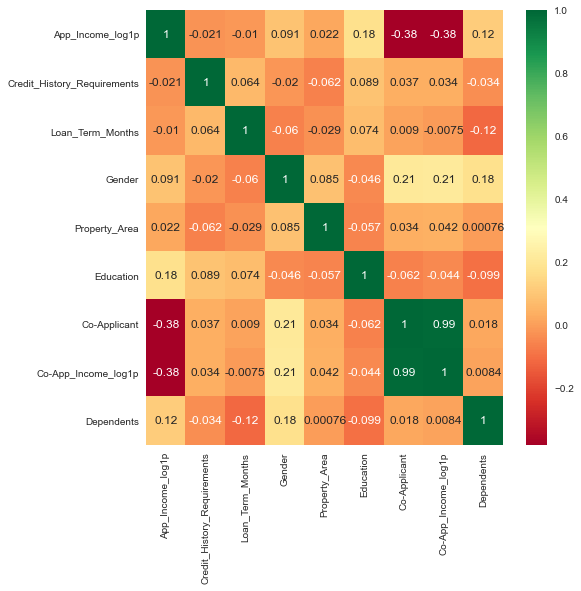

In [100]:
#get correlations of each categorical features in dataset
top_features = df_num[['App_Income_log1p','Credit_History_Requirements','Loan_Term_Months', 'Gender',
                       'Property_Area','Education','Co-Applicant','Co-App_Income_log1p', 'Dependents']]
corrmat = top_features.corr()
top = corrmat.index
plt.figure(figsize=(8,8))

                      #plot heat map
g=sns.heatmap(top_features[top].corr(),annot=True,cmap="RdYlGn")

##### Feature Extraction: Principal Component Analysis

In [101]:
features = StandardScaler().fit_transform(df_num)
features.shape

(460, 12)

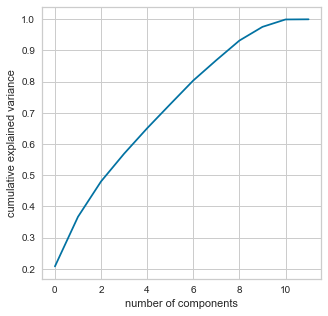

In [102]:
#set up the figure size
plt.rcParams['figure.figsize'] = (5,5)

pca = PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [103]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=9, whiten=True)

In [104]:
# Training and transform our data
pca.fit(features)
features_pca = pca.transform(features)

In [105]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 12
Reduced number of features: 9


#### 4. Part 2 Summary
All Feature extraction or Selection methods has some limitations. Chi-Square works best when all features are categorical, and ANOVA works best when all features are numerical. I had mixture of both data types. For this reason, I attempted to convert continuous variables into category bins. Although, I had the option to do separate analysis for both data types, I do not believe separate analysis would give me any insights about patterns among all features. Mutual Information method works for both data types, but I have to identify which ones are discrete. I believe this method gave me better insights on features. Further correlation analysis of these features showed some of the top features had some correlation. Later I will be eliminating variables with high correlation

Lastly, to predict Loan_Approval for customer, there are couple of models that will go best with this type of data, since most data type is binary, I may choose from Decision tree or Logistic Regression.


**References**
1. For Feature Selection Methods [Machine Learning Mastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
2. For PCA Analysis [Dimensionality Reduction Techniques](https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1)

<a id='Part_3_Analysis_-_Model_Evaluation'></a>
### Part 3 Analysis - Model Evaluation

I have decided to use feature selection method using Mutual Information classifier along with correlation chart instead of using PCA because I have too many categorical variables. Since feature selection methods use target variable to choose features, I have added another step of splitting the data into train and validation set before performing any data transformation or dimensionality reduction so this way I am not leaking any information from my validation set to training set. Please refer to [Part 2 Analysis - Dimensionality Reduction](#Part_2_Analysis_-_Dimensionality_Reduction).

I selected following Features based on Mutual Information and Correlation Chart:
1. Applicant Income log transformed
2. Credit History Requirements
3. Loan_Term Months
4. Property Area
5. Education

#### 1. Model Evaluation

In [106]:
feature_names = ['App_Income_log1p','Credit_History_Requirements', 'Loan_Term_Months','Property_Area','Education']

# training set
X_train = df_num[feature_names]
Y_train = target

# Validation set
X_val = val_copy[feature_names]

# converting target
Y_val = Y_val.replace({'Y': 1, 'N':0})

In [107]:
# creating Matrix

# training matrix
features_train = X_train.to_numpy()
target_train = Y_train.to_numpy()

#testing matrix
features_test = X_val.to_numpy()
target_test = Y_val.to_numpy()

##### Baseline Classification Model

In [108]:
from sklearn.dummy import DummyClassifier

In [109]:
# Create dummy classifier
dummy = DummyClassifier(strategy='stratified', random_state=1)

# "Train" model
dummy.fit(features_train, target_train)

# Get accuracy score
DummyScore = dummy.score(features_test, target_test)
print("Accuracy score for random guessing is {:.2f}".format(DummyScore))

Accuracy score for random guessing is 0.57


##### 1. Classification Model: Decision Tree Classification Model

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve, roc_auc_score

In [111]:
# Create Classifier
classifier1 = DecisionTreeClassifier(max_depth = 3, random_state=0)

# Train model
model_1 = classifier1.fit(features_train, target_train)

# Get accuracy score
score1 = classifier1.score(features_test, target_test)

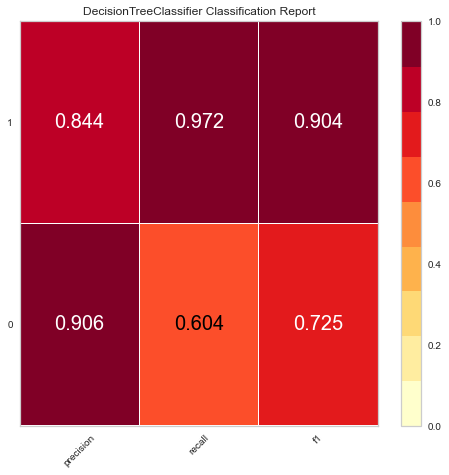

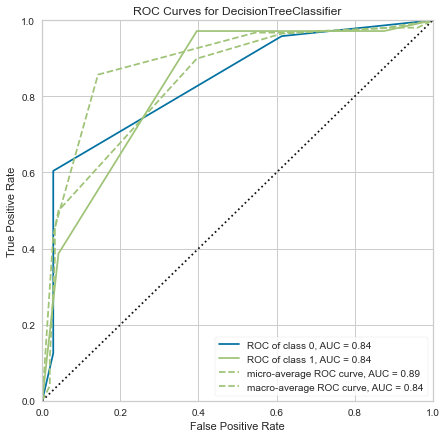

In [112]:
# visualizing the Score
plt.rcParams['figure.figsize'] = (7,7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(classifier1)

visualizer.fit(features_train, target_train)  # Fit the training data to the visualizer
visualizer.score(features_test, target_test) # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(classifier1)
 
visualizer.fit(features_train, target_train)  # Fit the training data to the visualizer
visualizer.score(features_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [113]:
cv_accuracy_score = cross_val_score(model_1, features_test, target_test, cv=5, scoring="accuracy").mean()
print("Cross validation Accuracy score: {}".format(cv_accuracy_score))

cv_precision_score = cross_val_score(model_1, features_test, target_test, cv=5, scoring="precision").mean()
print("Cross validation Precision score: {}".format(cv_precision_score))

cv_recall_score = cross_val_score(model_1, features_test, target_test, cv=5, scoring="recall").mean()
print("Cross validation Recall score: {}".format(cv_recall_score))

cv_f1_score = cross_val_score(model_1, features_test, target_test, cv=5, scoring="f1").mean()
print("Cross validation F1 score: {}".format(cv_f1_score))

print("Decision Tree Score for test set {}".format(score1))

Cross validation Accuracy score: 0.8174193548387096
Cross validation Precision score: 0.8236541236541235
Cross validation Recall score: 0.9428571428571428
Cross validation F1 score: 0.8771618246506915
Decision Tree Score for test set 0.8571428571428571


In [114]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [115]:
columns = X_train.columns.tolist()

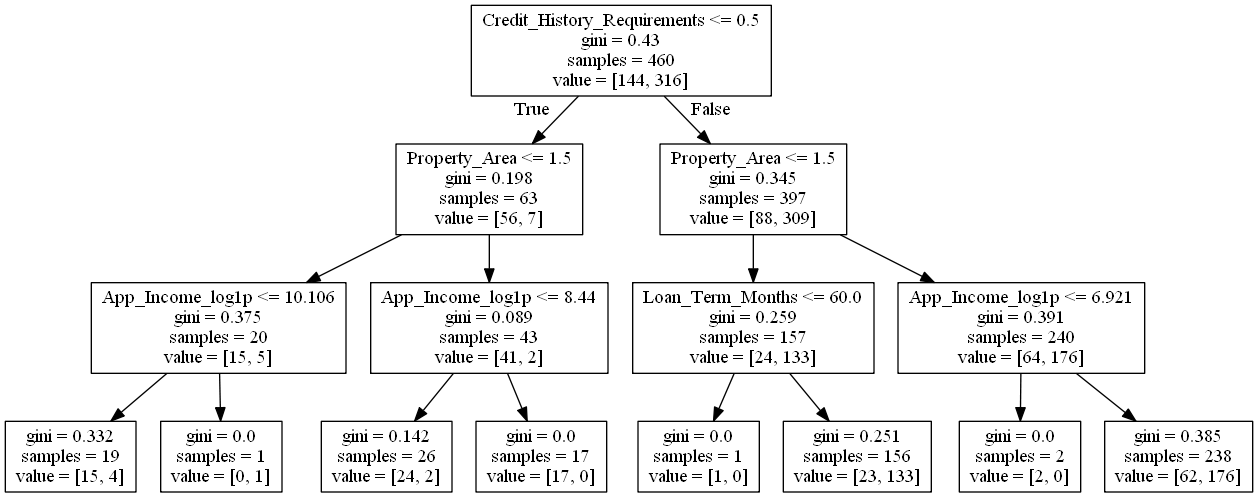

In [113]:
# Create DOT data
dot_data = tree.export_graphviz(classifier1,
                                out_file=None,
                                feature_names=columns)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

##### 2. Classification Model: Logistic Regression Classification Model

In [116]:
from sklearn.preprocessing import StandardScaler

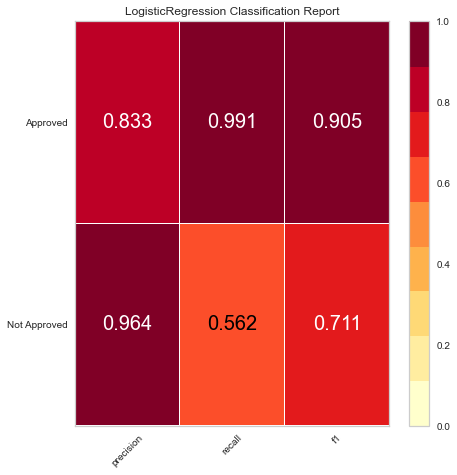

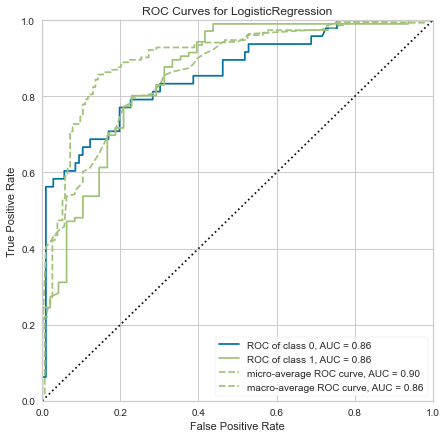

In [117]:
# Create Classifier
classifier2 = LogisticRegression(random_state=0)

# standardized features 
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

# Train model
model_2 = classifier2.fit(features_train, target_train)

# Get accuracy score
score2 = classifier2.score(features_test, target_test)

# visualizing the Score
plt.rcParams['figure.figsize'] = (7,7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(classifier2, classes=['Not Approved','Approved'])

visualizer.fit(features_train, target_train)  # Fit the training data to the visualizer
visualizer.score(features_test, target_test) # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(classifier2)
 
visualizer.fit(features_train, target_train)  # Fit the training data to the visualizer
visualizer.score(features_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [119]:
cv_accuracy_score = cross_val_score(model_2, features_test, target_test, cv=5, scoring="accuracy").mean()
print("Cross validation Accuracy score: {}".format(cv_accuracy_score))

cv_precision_score = cross_val_score(model_2, features_test, target_test, cv=5, scoring="precision").mean()
print("Cross validation Precision score: {}".format(cv_precision_score))

cv_recall_score = cross_val_score(model_2, features_test, target_test, cv=5, scoring="recall").mean()
print("Cross validation Recall score: {}".format(cv_recall_score))

cv_f1_score = cross_val_score(model_2, features_test, target_test, cv=5, scoring="f1").mean()
print("Cross validation F1 score: {}".format(cv_f1_score))

print("Logistic Regression Score for test set {}".format(score2))

Cross validation Accuracy score: 0.856989247311828
Cross validation Precision score: 0.8383394383394382
Cross validation Recall score: 0.9904761904761905
Cross validation F1 score: 0.9062563323201621
Logistic Regression Score for test set 0.8571428571428571


#### 2. Part 3 Summary



##### Key Steps before Model Evaluation
To perform Model evaluation and selection carefully, I re-did part 1 & part 2. I moved my data cleaning step to part 2 and instead of simply dropping the variables to handle missing data, I added a step of imputing missing variables using KNNImputer(). This helped me keeping my data intact. I also split the data into training and validation set before I performed any data transformations and Dimensionality reduction. In part 1 I added another step of analyzing the summary statistics of the data. Refer[Key Observations](#Key_Observations)

##### Model Evaluation Summary
Decision Tree
1. Cross validation Accuracy score: 0.817
2. Cross validation Precision score: 0.824
3. Cross validation Recall score: 0.943
4. Cross validation F1 score: 0.877
5. Decision Tree Score for test set 0.8571428571428571

Logistic Regression
1. Cross validation Accuracy score: 0.857
2. Cross validation Precision score: 0.838
3. Cross validation Recall score: 0.990
4. Cross validation F1 score: 0.906
5. Logistic Regression Score for test set 0.8571428571428571

Accuracy score against test set for both models are exact same, however, when cross validated, logistic regression scores are slightly better than decision tree classifier. The f1 score is higher by 1.26%. Although, Logistic regression looks like a better choice for this data, but I have not tuned any hyperparameters for either of the algorithms.

#### Final Steps

I will further try to reduce variance through by regularization and handling imbalanced classes for logistic regression and tuning depth and min_sample leafs for Decision tree classifier to choose between the two models. 

### Part 3 Modification - Model Selection, Fine tuning hyperparameters

#### 1. Model Selection

I selected the best model by creating a dictionary of candidate learning algorithms and their hyperparameters.

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [121]:
# Create a pipeline
pipe = Pipeline([("classifier", DecisionTreeClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l1', 'l2'],
                 "classifier__C": np.logspace(0, 4, 10)},
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__max_depth": [1,2, 3,4,5,6,7,8,9,10],
                 "classifier__min_samples_leaf": [1,2, 3,4,5,6,7,8,9,10, 11,12,13,14,15,16,17,18,19,20]}]



In [122]:
# Create grid search
gridsearch = GridSearchCV(pipe, search_space,cv=5, verbose=0)

# Fit grid search
best_model = gridsearch.fit(features_train, target_train)

In [124]:
cv_accuracy_score = cross_val_score(best_model, features_test, target_test, cv=5, scoring="accuracy").mean()
print("Cross validation Accuracy score: {}".format(cv_accuracy_score))

cv_precision_score = cross_val_score(best_model, features_test, target_test, cv=5, scoring="precision").mean()
print("Cross validation Precision score: {}".format(cv_precision_score))

cv_recall_score = cross_val_score(best_model, features_test, target_test, cv=5, scoring="recall").mean()
print("Cross validation Recall score: {}".format(cv_recall_score))

cv_f1_score = cross_val_score(best_model, features_test, target_test, cv=5, scoring="f1").mean()
print("Cross validation F1 score: {}".format(cv_f1_score))


Cross validation Accuracy score: 0.856989247311828
Cross validation Precision score: 0.8383394383394382
Cross validation Recall score: 0.9904761904761905
Cross validation F1 score: 0.9062563323201621


In [127]:
best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('classifier', LogisticRegression())],
 'verbose': False,
 'classifier': LogisticRegression(),
 'classifier__C': 1.0,
 'classifier__class_weight': None,
 'classifier__dual': False,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__l1_ratio': None,
 'classifier__max_iter': 100,
 'classifier__multi_class': 'auto',
 'classifier__n_jobs': None,
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__solver': 'lbfgs',
 'classifier__tol': 0.0001,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

#### 2. Summary

I didn't had much feedback. However, I already knew I made mistakes in cross-validation, instead of checking against testing set, I checked against training set. I fixed that in [Part 3 Analysis](#Part_3_Analysis_-_Model_Evaluation). I also added model selection and found Logistic Regression() with hyperparameters listed above is the best model for this data. Not much difference in the accuracy after fine tuning compared to accuracy before fine tuning hyperparameters.

Logistic Regression

1. Cross validation Accuracy score: 0.857
2. Cross validation Precision score: 0.838
3. Cross validation Recall score: 0.990
4. Cross validation F1 score: 0.906